### 1. Import relevant libraries

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings(action='ignore')

### 2. Load the data

In [2]:
# Load the transformed features for training and testing data
X_train_transformed = pd.read_csv('X_train_transformed.csv')
X_test_transformed = pd.read_csv('X_test_transformed.csv')

# Load the unchanged target variables for training and testing data
y_train = pd.read_csv('y_train.csv')['WQI']  # Assuming 'WQI' is the target variable column
y_test = pd.read_csv('y_test.csv')['WQI']    # Assuming 'WQI' is the target variable column

In [3]:
# Display the summary information of the loaded data
X_train_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 820 entries, 0 to 819
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Station_no                     820 non-null    float64
 1   Month                          820 non-null    float64
 2   Cond (μS/cm)                   820 non-null    float64
 3   DO (mg/L)                      820 non-null    float64
 4   pH                             820 non-null    float64
 5   NO2 (mg/L)                     820 non-null    float64
 6   NO3 (mg/L)                     820 non-null    float64
 7   TN (mg/L)                      820 non-null    float64
 8   TP (mg/L)                      820 non-null    float64
 9   TSS (mg/L)                     820 non-null    float64
 10  BOD (mg/L)                     820 non-null    float64
 11  Turbidity (NTU)                820 non-null    float64
 12  WQC_Excellent (4)              820 non-null    flo

The dataset consists of 10 columns, each representing a different feature associated with water quality assessment. These features encompass various measurements such as conductivity, dissolved oxygen (DO), pH level, and concentrations of substances like nitrites (NO2), nitrates (NO3), total nitrogen (TN), total phosphorus (TP), total suspended solids (TSS), biochemical oxygen demand (BOD), and turbidity. Notably, the dataset contains no missing values across all columns. Moreover, the data types for all columns are float64. 

In [4]:
X_test_transformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Station_no                     205 non-null    float64
 1   Month                          205 non-null    float64
 2   Cond (μS/cm)                   205 non-null    float64
 3   DO (mg/L)                      205 non-null    float64
 4   pH                             205 non-null    float64
 5   NO2 (mg/L)                     205 non-null    float64
 6   NO3 (mg/L)                     205 non-null    float64
 7   TN (mg/L)                      205 non-null    float64
 8   TP (mg/L)                      205 non-null    float64
 9   TSS (mg/L)                     205 non-null    float64
 10  BOD (mg/L)                     205 non-null    float64
 11  Turbidity (NTU)                205 non-null    float64
 12  WQC_Excellent (4)              205 non-null    flo

The testing dataset mirrors the structure of the training dataset, comprising 205 entries and 10 columns. Each row likely represents a distinct water measurement, with the columns representing features relevant to water quality assessment. These features include measurements such as conductivity, dissolved oxygen (DO), pH level, and concentrations of substances like nitrites (NO2), nitrates (NO3), total nitrogen (TN), total phosphorus (TP), total suspended solids (TSS), biochemical oxygen demand (BOD), and turbidity. Similar to the training dataset, the testing data exhibits no missing values across any columns.  Furthermore, the data types for all columns are float64.

### 3. Modeling

Based on the information provided by info(), it seems that both the training and testing datasets have been loaded successfully without any missing values. Each dataset contains 10 columns, all of which are numerical (float64), including the target variable 'WQI'. There are 820 samples in the training set and 205 samples in the testing set, with 10 features each. 

Since the target variable, WQI, is continuous, Linear Regression, Random Forest Regression, and XGBoost Regression model are used to explore different approaches and leverage the strengths of each method.

#### 3a. Making a Linear Regression Model: first model

In [5]:
# Define the Linear Regression model
linear_model = LinearRegression()

# Fit the model to the training data
linear_model.fit(X_train_transformed, y_train)

# Predict using the model
y_pred_linear = linear_model.predict(X_test_transformed)

# Evaluate the model
r2_linear = r2_score(y_test, y_pred_linear)
mse_score_linear = mean_squared_error(y_test, y_pred_linear)
mae_linear = mean_absolute_error(y_test, y_pred_linear)

print("Linear Regression:")
print("R-squared (R2) on Testing Set:", r2_linear)
print("Mean Squared Error (MSE) on Testing Set:", mse_score_linear)
print("Mean Absolute Error (MAE) on Testing Set:", mae_linear)


Linear Regression:
R-squared (R2) on Testing Set: 0.5723354928732027
Mean Squared Error (MSE) on Testing Set: 95.6728966107658
Mean Absolute Error (MAE) on Testing Set: 6.528685406492081


In [6]:
# Define the range of number of splits
num_splits_range = [3, 5, 7, 10]

# Dictionary to store cross-validation scores for each number of splits
cv_scores_linear_test = {}
cv_scores_linear_train = {}

for num_splits in num_splits_range:
    # Define cross-validation strategy with current number of splits
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)

    # Perform cross-validation for Linear Regression
    cv_scores_linear_test[num_splits] = cross_val_score(linear_model, X_test_transformed, y_test, cv=kf, scoring='r2')
    cv_scores_linear_train[num_splits] = cross_val_score(linear_model, X_train_transformed, y_train, cv=kf, scoring='r2')
  
    # Print the cross-validation scores for each number of splits
    print(f"{num_splits}-fold Cross-Validation Scores for Linear Regression:")
    print("Mean cross-validation score on testing set:", np.mean(cv_scores_linear_test[num_splits]))
    print("Mean cross-validation score on training set:", np.mean(cv_scores_linear_train[num_splits]))
    print("Standard deviation in cross-validation scores on testing set:", np.std(cv_scores_linear_test[num_splits]))
    print()

3-fold Cross-Validation Scores for Linear Regression:
Mean cross-validation score on testing set: 0.8036149281953895
Mean cross-validation score on training set: 0.7261970112259043
Standard deviation in cross-validation scores on testing set: 0.020857955708799444

5-fold Cross-Validation Scores for Linear Regression:
Mean cross-validation score on testing set: 0.7878371567247182
Mean cross-validation score on training set: 0.7214882545058139
Standard deviation in cross-validation scores on testing set: 0.05015803228375413

7-fold Cross-Validation Scores for Linear Regression:
Mean cross-validation score on testing set: 0.786899897950616
Mean cross-validation score on training set: 0.736839125187784
Standard deviation in cross-validation scores on testing set: 0.05816616636428495

10-fold Cross-Validation Scores for Linear Regression:
Mean cross-validation score on testing set: 0.7792668323413623
Mean cross-validation score on training set: 0.7518151297918668
Standard deviation in cross

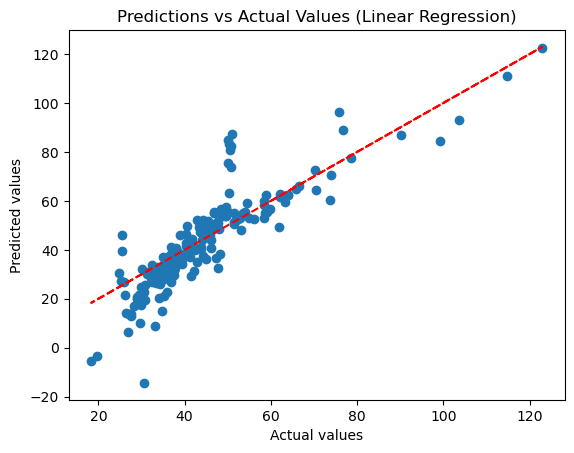

In [7]:
# Plot the predictions against the actual values for Linear Regression
plt.scatter(y_test, y_pred_linear)
plt.plot(y_test, y_test, color='red', linestyle='--')  # Plot the perfect fit line
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predictions vs Actual Values (Linear Regression)')
plt.show()

In [8]:
# Define the Lasso model
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha parameter as needed

# Fit the Lasso model to the training data
lasso_model.fit(X_train_transformed, y_train)

# Predict using the Lasso model
y_pred_lasso = lasso_model.predict(X_test_transformed)

# Evaluate the Lasso model
lasso_r2 = r2_score(y_test, y_pred_lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_mae = mean_absolute_error(y_test, y_pred_lasso)

print("Lasso Regression:")
print("R-squared (R2) on Testing Set:", lasso_r2)
print("Mean Squared Error (MSE) on Testing Set:", lasso_mse)
print("Mean Absolute Error (MAE) on Testing Set:", lasso_mae)

Lasso Regression:
R-squared (R2) on Testing Set: 0.5175572065102543
Mean Squared Error (MSE) on Testing Set: 107.9273559834335
Mean Absolute Error (MAE) on Testing Set: 6.698308226307317


In [9]:
# Define the Ridge model
ridge_model = Ridge(alpha=0.1)  # You can adjust the alpha parameter as needed

# Fit the Ridge model to the training data
ridge_model.fit(X_train_transformed, y_train)

# Predict using the Ridge model
y_pred_ridge = ridge_model.predict(X_test_transformed)

# Evaluate the Ridge model
ridge_r2 = r2_score(y_test, y_pred_ridge)
ridge_mse = mean_squared_error(y_test, y_pred_ridge)
ridge_mae = mean_absolute_error(y_test, y_pred_ridge)

print("Ridge Regression:")
print("R-squared (R2) on Testing Set:", ridge_r2)
print("Mean Squared Error (MSE) on Testing Set:", ridge_mse)
print("Mean Absolute Error (MAE) on Testing Set:", ridge_mae)

Ridge Regression:
R-squared (R2) on Testing Set: 0.5138312523060014
Mean Squared Error (MSE) on Testing Set: 108.76088980590299
Mean Absolute Error (MAE) on Testing Set: 6.7364501204980325


#### 3b. Making a Random Forest Regression Methods: second model

In [10]:
# Define the Random Forest Regression model
rf_model = RandomForestRegressor()

# Fit the model to the training data
rf_model.fit(X_train_transformed, y_train)

# Predict using the model
y_pred_rf = rf_model.predict(X_test_transformed)

# Evaluate the model
r2_rf = r2_score(y_test, y_pred_rf)
mse_score_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)

print("Random Forest Regression:")
print("R-squared (R2) on Testing Set:", r2_rf)
print("Mean Squared Error (MSE) on Testing Set:", mse_score_rf)
print("Mean Absolute Error (MAE) on Testing Set:", mae_rf)


Random Forest Regression:
R-squared (R2) on Testing Set: 0.9220536538565067
Mean Squared Error (MSE) on Testing Set: 17.43738980322345
Mean Absolute Error (MAE) on Testing Set: 2.9275524505265964


In [11]:
# Define the range of number of splits
num_splits_range = [3, 5, 7, 10]

# Dictionary to store cross-validation scores for each number of splits
cv_scores_rf_test = {}
cv_scores_rf_train = {}

for num_splits in num_splits_range:
    # Define cross-validation strategy with current number of splits
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)
    
    # Define the Random Forest Regression model
    rf_model = RandomForestRegressor()
    
    # Perform hyperparameter tuning with GridSearchCV
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }
    grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=kf, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train_transformed, y_train)
    
    # Print best estimator and best score
    print(f"{num_splits}-fold Cross-Validation Best Estimator:")
    print(grid_search.best_estimator_)
    print(f"{num_splits}-fold Cross-Validation Best Score:")
    print(grid_search.best_score_)
    
    # Get the best model
    best_rf_model = grid_search.best_estimator_
    
    # Evaluate the best model using cross-validation on the training set
    cv_scores_rf_train[num_splits] = cross_val_score(best_rf_model, X_train_transformed, y_train, cv=kf, scoring='r2')
    
    # Evaluate the best model using cross-validation on the testing set
    cv_scores_rf_test[num_splits] = cross_val_score(best_rf_model, X_test_transformed, y_test, cv=kf, scoring='r2')

# Print the cross-validation scores for each number of splits
for num_splits in num_splits_range:
    print(f"{num_splits}-fold Cross-Validation Scores:")
    print("Mean cross-validation score on training set:", np.mean(cv_scores_rf_train[num_splits]))
    print("Mean cross-validation score on testing set:", np.mean(cv_scores_rf_test[num_splits]))
    print("Standard deviation in cross-validation scores on testing set:", np.std(cv_scores_rf_test[num_splits]))

3-fold Cross-Validation Best Estimator:
RandomForestRegressor(max_depth=10, max_features='sqrt', n_estimators=300)
3-fold Cross-Validation Best Score:
0.8852710289858737
5-fold Cross-Validation Best Estimator:
RandomForestRegressor(max_depth=20, max_features='log2', n_estimators=200)
5-fold Cross-Validation Best Score:
0.9061916565388446
7-fold Cross-Validation Best Estimator:
RandomForestRegressor(max_features='sqrt', n_estimators=200)
7-fold Cross-Validation Best Score:
0.9255411761060266
10-fold Cross-Validation Best Estimator:
RandomForestRegressor(max_features='sqrt', n_estimators=200)
10-fold Cross-Validation Best Score:
0.9228228592564756
3-fold Cross-Validation Scores:
Mean cross-validation score on training set: 0.8823374859035473
Mean cross-validation score on testing set: 0.7823255412544073
Standard deviation in cross-validation scores on testing set: 0.08059995927656316
5-fold Cross-Validation Scores:
Mean cross-validation score on training set: 0.8997005719151682
Mean cros

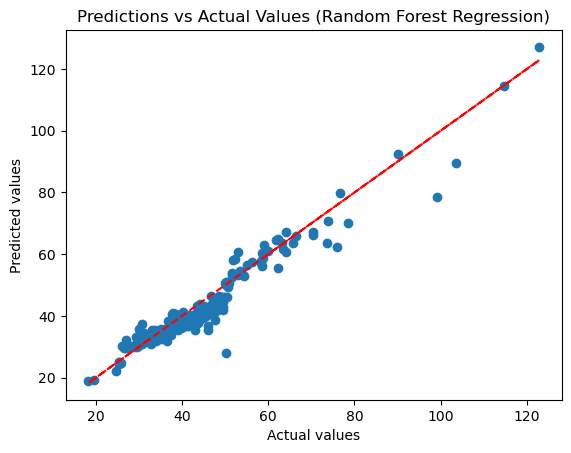

In [12]:
# Plot the predictions against the actual values for Random Forest Regression
plt.scatter(y_test, y_pred_rf)
plt.plot(y_test, y_test, color='red', linestyle='--')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predictions vs Actual Values (Random Forest Regression)')
plt.show()

#### 3d. Making a XGBoost Regression Model: third model

In [13]:
# Define the XGBoost Regression model
xgb_model = xgb.XGBRegressor()

# Fit the model to the training data
xgb_model.fit(X_train_transformed, y_train)

# Predict using the model
y_pred_xgb = xgb_model.predict(X_test_transformed)

# Evaluate the model
r2_xgb = r2_score(y_test, y_pred_xgb)
mse_score_xgb = mean_squared_error(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

print("XGBoost Regression:")
print("R-squared (R2) on Testing Set:", r2_xgb)
print("Mean Squared Error (MSE) on Testing Set:", mse_score_xgb)
print("Mean Absolute Error (MAE) on Testing Set:", mae_xgb)

XGBoost Regression:
R-squared (R2) on Testing Set: 0.9539300448804663
Mean Squared Error (MSE) on Testing Set: 10.306317170498685
Mean Absolute Error (MAE) on Testing Set: 2.173733985548038


In [ ]:
# Dictionary to store cross-validation scores for each number of splits
cv_scores_xgb_test = {}
cv_scores_xgb_train = {}

# Define the XGBoost Regression model
xgb_model = xgb.XGBRegressor()

for num_splits in num_splits_range:
    # Define cross-validation strategy with current number of splits
    kf = KFold(n_splits=num_splits, shuffle=True, random_state=42)
    
    # Perform hyperparameter tuning with GridSearchCV
    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [3, 5, 7],
        'learning_rate': [0.05, 0.1, 0.15],
        'min_child_weight': [1, 2, 3],
        'subsample': [0.7, 0.8, 0.9],
        'colsample_bytree': [0.7, 0.8, 0.9]
    }
    grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=kf, scoring='r2')
    grid_search.fit(X_train_transformed, y_train)
    
    # Print best estimator and best score
    print(f"{num_splits}-fold Cross-Validation Best Estimator:")
    print(grid_search.best_estimator_)
    print(f"{num_splits}-fold Cross-Validation Best Score:")
    print(grid_search.best_score_)
    
    # Get the best model
    best_xgb_model = grid_search.best_estimator_
    
    # Evaluate the best model using cross-validation on the training set
    cv_scores_xgb_train[num_splits] = cross_val_score(best_xgb_model, X_train_transformed, y_train, cv=kf, scoring='r2', n_jobs=-1)
    
    # Evaluate the best model using cross-validation on the testing set
    cv_scores_xgb_test[num_splits] = cross_val_score(best_xgb_model, X_test_transformed, y_test, cv=kf, scoring='r2')

# Print the cross-validation scores for each number of splits
for num_splits in num_splits_range:
    print(f"{num_splits}-fold Cross-Validation Scores:")
    print("Mean cross-validation score on training set:", np.mean(cv_scores_xgb_train[num_splits]))
    print("Mean cross-validation score on testing set:", np.mean(cv_scores_xgb_test[num_splits]))
    print("Standard deviation in cross-validation scores on testing set:", np.std(cv_scores_xgb_test[num_splits]))

3-fold Cross-Validation Best Estimator:
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.15, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=300, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
3-fold Cross-Validation Best Score:
0.9623901398112519
5-fold Cross-Validation Best Estimator:
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
      

In [ ]:
# Plot the predictions against the actual values
plt.scatter(y_test, y_pred_xgb, color='blue', label='Predictions')
plt.plot(y_test, y_test, color='red', linestyle='--', label='Perfect Fit')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Predictions vs Actual Values for XGBoost Regression')
plt.legend()
plt.show()

### 4. Model Evaluation

### 5. Final Model